# <font color='#d50283'>IT Academy - Data Science Itinerary</font>
## Sprint 9 Task 1 - Feature Engineering
### Assignment by: Kat Weissman

#### General objective:

- Work correctly with correlation, covariance and feature scaling

#### Python Learning Objectives:
- Pre-process the data by performing feature engineering
- Interpret the different concepts of feature engineering

*Recommended learning resources:*
- https://stackabuse.com/covariance-and-correlation-in-python/
- https://realpython.com/numpy-scipy-pandas-correlation-python/
- https://medium.com/@sebastiannorena/finding-correlation-between-many-variables-multidimensional-dataset-with-python-5deb3f39ffb3
- https://machinelearningmastery.com/improve-model-accuracy-with-data-pre-processing/
- https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40
- https://www.analyticsvidhya.com/blog/2015/12/improve-machine-learning-results/
- https://machinelearningmastery.com/scale-machine-learning-data-scratch-python/
- https://medium.com/@stallonejacob/data-science-scaling-of-data-in-python-ec7ad220b339
- https://towardsdatascience.com/feature-engineering-in-python-part-i-the-most-powerful-way-of-dealing-with-data-8e2447e7c69e
- https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/#:~:text=There%20are%20two%20main%20types,into%20wrapper,%20filter%20and%20intrinsic
- https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
- https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html


In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Level 1

### Exercise 1 
Grab a sports-themed dataset that you like and normalize categorical attributes in dummy. Standardize numeric attributes with StandardScaler.

I will use the 2018 and 2019 IFSC Sport Climbing Competition Results for Bouldering: https://www.kaggle.com/brkurzawa/ifsc-sport-climbing-competition-results

#### Data Exploration

In [2]:
pd.set_option('display.max_columns', None)  #set display to show all columns

In [3]:
data_link = 'https://raw.githubusercontent.com/KatBCN/Feature-engineering/main/boulder_results.csv'
df = pd.read_csv(data_link)

In [4]:
#Show number of rows and columns in dataframe
df.shape

(9741, 13)

In [5]:
#Show column names
df.columns

Index(['Competition Title', 'Competition Date', 'FIRST', 'LAST', 'Nation',
       'StartNr', 'Rank', 'Qualification', 'Qualification 1',
       'Qualification 2', 'Semifinal', 'Final', 'Category'],
      dtype='object')

In [6]:
#Display first 10 rows of dataframe
df.head(10)

,Competition Title,Competition Date,FIRST,LAST,Nation,StartNr,Rank,Qualification,Qualification 1,Qualification 2,Semifinal,Final,Category
0,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Naile,MEIGNAN,FRA,15.0,1,6T7z99,NaN,NaN,3T4z55,3T4z89,boulder
1,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Miriam,FOGU,ITA,27.0,2,4T8z814,NaN,NaN,3T4z55,2T4z27,boulder
2,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Vanda,MICHALKOVA,SVK,48.0,3,6T7z89,NaN,NaN,3T3z43,2T3z23,boulder
3,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Lola,SAUTIER,FRA,17.0,4,4T6z69,NaN,NaN,2T3z89,1T3z38,boulder
4,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Polina,KULAGINA,RUS,39.0,5,4T6z611,NaN,NaN,3T4z76,1T3z47,boulder
5,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Kintana,ILTIS,FRA,16.0,6,6T7z77,NaN,NaN,2T3z88,1T2z33,boulder
6,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Julia,LOTZ,AUT,1.0,7,6T8z811,NaN,NaN,1T4z25,NaN,boulder
7,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Aida,TORRES ILLAMOLA,ESP,14.0,8,5T6z88,NaN,NaN,1T3z26,NaN,boulder
8,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Daria,FURMANOVA,RUS,37.0,9,5T7z1213,NaN,NaN,1T3z27,NaN,boulder
9,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Betka,DEBEVEC,SLO,41.0,10,7T7z97,NaN,NaN,1T3z28,NaN,boulder


In [7]:
#Display last 10 rows of dataframe
df.tail(10)

,Competition Title,Competition Date,FIRST,LAST,Nation,StartNr,Rank,Qualification,Qualification 1,Qualification 2,Semifinal,Final,Category
9731,European Youth Cup (B) - Graz (AUT) 2018,28 - 29 April 2018,Ymer,ALBER,SWE,295.0,28,1T3z14,NaN,NaN,NaN,NaN,boulder
9732,European Youth Cup (B) - Graz (AUT) 2018,28 - 29 April 2018,Luca,BERTACCO,ITA,287.0,29,1T3z27,NaN,NaN,NaN,NaN,boulder
9733,European Youth Cup (B) - Graz (AUT) 2018,28 - 29 April 2018,Carmel,RAZ ROMEO,ISR,298.0,30,1T3z56,NaN,NaN,NaN,NaN,boulder
9734,European Youth Cup (B) - Graz (AUT) 2018,28 - 29 April 2018,Joseph,CZUBKOWSKI,GBR,300.0,31,1T3z59,NaN,NaN,NaN,NaN,boulder
9735,European Youth Cup (B) - Graz (AUT) 2018,28 - 29 April 2018,Aleksi,MIKKOLA,FIN,302.0,32,1T2z24,NaN,NaN,NaN,NaN,boulder
9736,European Youth Cup (B) - Graz (AUT) 2018,28 - 29 April 2018,Tomáš,LUKÁŠEK,CZE,307.0,33,1T2z36,NaN,NaN,NaN,NaN,boulder
9737,European Youth Cup (B) - Graz (AUT) 2018,28 - 29 April 2018,Felix Ståhl,WADSTEN,SWE,297.0,34,1T2z47,NaN,NaN,NaN,NaN,boulder
9738,European Youth Cup (B) - Graz (AUT) 2018,28 - 29 April 2018,Hauk Steinsson,LEM,NOR,309.0,35,1T2z57,NaN,NaN,NaN,NaN,boulder
9739,European Youth Cup (B) - Graz (AUT) 2018,28 - 29 April 2018,Christian Phillip,ELIASSEN,NOR,303.0,36,0T2z05,NaN,NaN,NaN,NaN,boulder
9740,European Youth Cup (B) - Graz (AUT) 2018,28 - 29 April 2018,Jan,MACHARACEK,CZE,292.0,37,0T1z02,NaN,NaN,NaN,NaN,boulder


In [8]:
#Checking dataset variables
df.dtypes

Competition Title     object
Competition Date      object
FIRST                 object
LAST                  object
Nation                object
StartNr              float64
Rank                   int64
Qualification         object
Qualification 1       object
Qualification 2       object
Semifinal             object
Final                 object
Category              object
dtype: object

In [9]:
#check for duplicates
sum(df.duplicated())

3272

In [10]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(6469, 13)

In [12]:
#View summary statistics of each variable.
def mySummary(df):
    for v in df.columns:
            print ("\n" + v)
            print(df[v].describe())
            print ()

mySummary(df)


Competition Title
count                                                  6469
unique                                                   33
top       IFSC Youth World Championships -  Arco (ITA) 2...
freq                                                    472
Name: Competition Title, dtype: object


Competition Date
count                     6469
unique                      31
top       22  - 31 August 2019
freq                       472
Name: Competition Date, dtype: object


FIRST
count     6469
unique    1437
top       Anna
freq        49
Name: FIRST, dtype: object


LAST
count     6469
unique    1680
top        KIM
freq        40
Name: LAST, dtype: object


Nation
count     6469
unique      70
top        FRA
freq       359
Name: Nation, dtype: object


StartNr
count    6261.000000
mean      166.793803
std       143.312870
min         1.000000
25%        56.000000
50%       129.000000
75%       235.000000
max       799.000000
Name: StartNr, dtype: float64


Rank
count    6469.000000


There appears to be an error with cateogry, because there are 2 unique categories and this data set should only be related to Boulder events.

In [13]:
categories = df.Category.unique()  # assign unique values of categories to a variable.
categories # check the variable

array(['boulder', 'ldering'], dtype=object)

In [14]:
df["Category"].replace({categories[1]: categories[0]}, inplace=True)  # make categories consistent using variable

There also appears to be a different format for some events, which have two qualification groups instead of one. I would like to know which events have two qualification groups.

In [15]:
df.Qualification.count() + df['Qualification 1'].count() + df['Qualification 2'].count() == df.shape[0]

True

The total number of rows appears to be divided between Qualification, Qualification 1, and Qualification 2, so I expect the titles of the events to be different for those that have two rounds of qualification than those that simply have a single qualification round.

In [16]:
df2 = df[df['Qualification 1'].notna()]  # a dataframe of results which have Qualification 1 results not NA
df3 = df[df['Qualification 2'].notna()]  # a dataframe of results which have Qualification 2 results not NA
df4 = df[df['Qualification'].notna()]    # a dataframe of results which have Qualification results not NA

In [17]:
df2['Competition Title'].unique() == df3['Competition Title'].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

As expected, all competitions that have a round called 'Qualification 1' also have a round called 'Qualification 2'

In [18]:
TwoRoundComps = df2['Competition Title'].unique()
OneRoundComps = df4['Competition Title'].unique()
AllComps = df['Competition Title'].unique()
len(TwoRoundComps) + len(OneRoundComps) == len(AllComps)

False

Unexpectedly, some competitions appear to have all three Qualification columns included.

In [19]:
np.intersect1d(TwoRoundComps, OneRoundComps)  #use np.intersect1d function to find common elements

array(['IFSC Youth World Championships -  Arco (ITA) 2019 ',
       'IFSC Youth World Championships -  Moscow (RUS) 2018'],
      dtype=object)

The Youth World Championships have an inconsistent format compared to other events. This is likely because there are multiple levels of competitors within the Youth World Championships, and those variables are not present in this data set. There are separate competitions depending on age as Junior, Youth A, and Youth B. Each age category also has separate male and female competitions.

Let's take a look at the titles of all the competitions to see how we can categorize this data set.

In [20]:
AllComps

array(['European Youth Championships (B) - Brixen (ITA) 2019',
       'European Championship (B) - Zakopane (POL) 2019',
       'IFSC Youth World Championships -  Arco (ITA) 2019 ',
       'IFSC Climbing World Championships - Hachioji (JPN) 2019',
       'IFSC Climbing Worldcup (B) - Vail (USA) 2019 ',
       'European Youth Cup (B) - Sofia (BUL) 2019',
       'IFSC Climbing Worldcup (B) - Munich (GER) 2019',
       'European Youth Cup (B) - Graz (AUT) 2019',
       'IFSC Climbing Worldcup (B,S) - Wujiang (CHN) 2019',
       'European Youth Cup (B) - Soure (POR) 2019',
       'IFSC Climbing Worldcup (B,S) - Chongqing (CHN) 2019',
       'IFSC Climbing Worldcup (B,S) - Moscow (RUS) 2019 ',
       'IFSC Climbing Worldcup (B) - Meiringen (SUI) 2019 ',
       'Asian Cup (B) - Hong Kong (HKG) 2019',
       'IFSC PanAmerican Championship (L, S, B, C) - Guayaquil (ECU) 2018',
       'Asian Championships - Kurayoshi (JPN) 2018 ',
       'Asian Youth Championships - Chongqing (CHN) 2018',
     

It would be helpful to categorize adult competitions separately from youth competitions, and also separate continental competitions from world competitions.

I will start by making a dictionary for categorizing competition by age.

In [21]:
AgeDict = {}
for comp in AllComps:
    if 'youth' in comp.lower():
        AgeDict[comp] = "youth"
    else:
        AgeDict[comp] = "adult"
AgeDict

{'European Youth Championships (B) - Brixen (ITA) 2019': 'youth',
 'European Championship (B) - Zakopane (POL) 2019': 'adult',
 'IFSC Youth World Championships -  Arco (ITA) 2019 ': 'youth',
 'IFSC Climbing World Championships - Hachioji (JPN) 2019': 'adult',
 'IFSC Climbing Worldcup (B) - Vail (USA) 2019 ': 'adult',
 'European Youth Cup (B) - Sofia (BUL) 2019': 'youth',
 'IFSC Climbing Worldcup (B) - Munich (GER) 2019': 'adult',
 'European Youth Cup (B) - Graz (AUT) 2019': 'youth',
 'IFSC Climbing Worldcup (B,S) - Wujiang (CHN) 2019': 'adult',
 'European Youth Cup (B) - Soure (POR) 2019': 'youth',
 'IFSC Climbing Worldcup (B,S) - Chongqing (CHN) 2019': 'adult',
 'IFSC Climbing Worldcup (B,S) - Moscow (RUS) 2019 ': 'adult',
 'IFSC Climbing Worldcup (B) - Meiringen (SUI) 2019 ': 'adult',
 'Asian Cup (B) - Hong Kong (HKG) 2019': 'adult',
 'IFSC PanAmerican Championship (L, S, B, C) - Guayaquil (ECU) 2018': 'adult',
 'Asian Championships - Kurayoshi (JPN) 2018 ': 'adult',
 'Asian Youth Ch

Next, I will make a dictionary for categorizing competitions by continent name or world.

In [22]:
WorldDict = {}
for comp in AllComps:
    if 'world' in comp.lower():
        WorldDict[comp] = "world"
    elif 'europe' in comp.lower():
        WorldDict[comp] = "europe"
    elif 'asia' in comp.lower():
        WorldDict[comp] = "asia"
    elif 'america' in comp.lower():
        WorldDict[comp] = "america"
    elif 'africa' in comp.lower():
        WorldDict[comp] = "africa"
    elif 'oceania' in comp.lower():
        WorldDict[comp] = "oceania"
    else:
        WorldDict[comp] = "other"
WorldDict

{'European Youth Championships (B) - Brixen (ITA) 2019': 'europe',
 'European Championship (B) - Zakopane (POL) 2019': 'europe',
 'IFSC Youth World Championships -  Arco (ITA) 2019 ': 'world',
 'IFSC Climbing World Championships - Hachioji (JPN) 2019': 'world',
 'IFSC Climbing Worldcup (B) - Vail (USA) 2019 ': 'world',
 'European Youth Cup (B) - Sofia (BUL) 2019': 'europe',
 'IFSC Climbing Worldcup (B) - Munich (GER) 2019': 'world',
 'European Youth Cup (B) - Graz (AUT) 2019': 'europe',
 'IFSC Climbing Worldcup (B,S) - Wujiang (CHN) 2019': 'world',
 'European Youth Cup (B) - Soure (POR) 2019': 'europe',
 'IFSC Climbing Worldcup (B,S) - Chongqing (CHN) 2019': 'world',
 'IFSC Climbing Worldcup (B,S) - Moscow (RUS) 2019 ': 'world',
 'IFSC Climbing Worldcup (B) - Meiringen (SUI) 2019 ': 'world',
 'Asian Cup (B) - Hong Kong (HKG) 2019': 'asia',
 'IFSC PanAmerican Championship (L, S, B, C) - Guayaquil (ECU) 2018': 'america',
 'Asian Championships - Kurayoshi (JPN) 2018 ': 'asia',
 'Asian You

In [23]:
df['Age'] = df['Competition Title'].map(AgeDict)
df['Continent'] = df['Competition Title'].map(WorldDict)

In [24]:
df.groupby(["Continent","Age"])['Competition Title'].describe()

count unique  \
Continent Age                  
america   adult    55      1   
asia      adult   268      4   
          youth   151      1   
europe    adult    91      1   
          youth  2248      9   
world     adult  2783     15   
          youth   873      2   

                                                               top freq  
Continent Age                                                            
america   adult  IFSC PanAmerican Championship (L, S, B, C) - G...   55  
asia      adult        Asian Championships - Kurayoshi (JPN) 2018    87  
          youth   Asian Youth Championships - Chongqing (CHN) 2018  151  
europe    adult    European Championship (B) - Zakopane (POL) 2019   91  
          youth           European Youth Cup (B) - Graz (AUT) 2019  328  
world     adult  IFSC Climbing World Championships - Innsbruck ...  262  
          youth  IFSC Youth World Championships -  Arco (ITA) 2...  472

Grouping by continent and age categories, we can see the number of results in our data set that correspond to each category. In general, the World competitions have the most results, followed by European competitions. Interestingly, there are no results available for American youth competitions. In time period of our data, there are no results for Oceania or Africa. Since Climbing is now part of the Olympic games, this data will likely be available in the future.

Now that our data has the categories we are interested in, we can create dummy variables.

In [25]:
age_dummies = pd.get_dummies(df['Age'])  #get dummy variables by age
age_dummies.head()

,adult,youth
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [26]:
cont_dummies =  pd.get_dummies(df['Continent'])   #get dummy variables by continent
cont_dummies.head()

,america,asia,europe,world
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


The next step is to concatenate the data frames of dummy variables with the original data frame.

In [27]:
df = pd.concat([df, age_dummies, cont_dummies], axis = 1)
df.head()

,Competition Title,Competition Date,FIRST,LAST,Nation,StartNr,Rank,Qualification,Qualification 1,Qualification 2,Semifinal,Final,Category,Age,Continent,adult,youth,america,asia,europe,world
0,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Naile,MEIGNAN,FRA,15.0,1,6T7z99,NaN,NaN,3T4z55,3T4z89,boulder,youth,europe,0,1,0,0,1,0
1,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Miriam,FOGU,ITA,27.0,2,4T8z814,NaN,NaN,3T4z55,2T4z27,boulder,youth,europe,0,1,0,0,1,0
2,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Vanda,MICHALKOVA,SVK,48.0,3,6T7z89,NaN,NaN,3T3z43,2T3z23,boulder,youth,europe,0,1,0,0,1,0
3,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Lola,SAUTIER,FRA,17.0,4,4T6z69,NaN,NaN,2T3z89,1T3z38,boulder,youth,europe,0,1,0,0,1,0
4,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Polina,KULAGINA,RUS,39.0,5,4T6z611,NaN,NaN,3T4z76,1T3z47,boulder,youth,europe,0,1,0,0,1,0


Now that we have dummy variables for our categories, the next step is to pre process the numerical results and scale them. The important numerical features are the number of tops acheived, number of zones acheived, number of attempts to top, and number of attempts to zone per round of competition. Currently, all of those numbers are stored in the same variable, which is the name of the round, so they need to be separated into their own columns for analysis.

https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html

In [28]:
def splitFirstHalf(string):
    return string[:len(string)//2]

def splitSecondHalf(string):
    return string[len(string)//2:]

def splitScores(df, Round):
    """Returns new data frame with number of tops, zones, attempts to top, and attempts to zone"""
    new = df[Round].str.split(pat = "[TtZz]", n = 2, expand = True) # Split tops and zones
    
    # rename columns
    if Round == "Qualification":
        Round = "Quali"
    elif Round == "Qualification 1":
        Round = "Quali_1"
    elif Round == "Qualification 2":
        Round = "Quali_2"
    elif Round == "Semifinal":
        Round = "Semi"
    new = new.rename(columns={0: Round+"Tops", 1: Round+"Zones", 2:"Attempts"})
   
    new = new.astype({"Attempts": str}) # change type to string for string methods
    new[Round+"TopAtt"] = new["Attempts"] .apply(splitFirstHalf) # Split attempts to top
    new[Round+"ZoneAtt"] = new["Attempts"].apply(splitSecondHalf) # Split attempts to zone
    new = new.drop(columns=["Attempts"]) # Drop original attempts column
    
    #Make sure all columns are numeric
    new[Round+"Tops"] = pd.to_numeric(arg=new[Round+"Tops"], errors='coerce', downcast='integer')
    new[Round+"Zones"] = pd.to_numeric(arg=new[Round+"Zones"], errors='coerce', downcast='integer')
    new[Round+"TopAtt"] = pd.to_numeric(arg=new[Round+"TopAtt"], errors='coerce', downcast='integer')
    new[Round+"ZoneAtt"] = pd.to_numeric(arg=new[Round+"ZoneAtt"], errors='coerce', downcast='integer')
    
    return new

In [29]:
QualiNums = splitScores(df, "Qualification")
Quali1Nums = splitScores(df, "Qualification 1")
Quali2Nums = splitScores(df, "Qualification 2") 
SemiNums = splitScores(df, "Semifinal")
FinalNums = splitScores(df, "Final")

In [30]:
QualiNums.head()

,QualiTops,QualiZones,QualiTopAtt,QualiZoneAtt
0,6.0,7.0,9.0,9.0
1,4.0,8.0,8.0,14.0
2,6.0,7.0,8.0,9.0
3,4.0,6.0,6.0,9.0
4,4.0,6.0,6.0,11.0


In [31]:
QualiNums.tail()

,QualiTops,QualiZones,QualiTopAtt,QualiZoneAtt
6464,2.0,3.0,7.0,10.0
6465,2.0,3.0,7.0,10.0
6466,2.0,3.0,8.0,10.0
6467,2.0,3.0,11.0,11.0
6468,2.0,3.0,15.0,16.0


The Qualificaiton split appears correct.

In [32]:
SemiNums.head()

,SemiTops,SemiZones,SemiTopAtt,SemiZoneAtt
0,3.0,4.0,5.0,5.0
1,3.0,4.0,5.0,5.0
2,3.0,3.0,4.0,3.0
3,2.0,3.0,8.0,9.0
4,3.0,4.0,7.0,6.0


In [33]:
SemiNums.tail()

,SemiTops,SemiZones,SemiTopAtt,SemiZoneAtt
6464,NaN,NaN,NaN,NaN
6465,NaN,NaN,NaN,NaN
6466,NaN,NaN,NaN,NaN
6467,NaN,NaN,NaN,NaN
6468,NaN,NaN,NaN,NaN


The Semifinal split appears correct.

In [34]:
FinalNums.head()

,FinalTops,FinalZones,FinalTopAtt,FinalZoneAtt
0,3.0,4.0,8.0,9.0
1,2.0,4.0,2.0,7.0
2,2.0,3.0,2.0,3.0
3,1.0,3.0,3.0,8.0
4,1.0,3.0,4.0,7.0


In [35]:
FinalNums.tail()

,FinalTops,FinalZones,FinalTopAtt,FinalZoneAtt
6464,NaN,NaN,NaN,NaN
6465,NaN,NaN,NaN,NaN
6466,NaN,NaN,NaN,NaN
6467,NaN,NaN,NaN,NaN
6468,NaN,NaN,NaN,NaN


The Final split appears correct. The next step is to concatenate all of the numeric variables to the data set.

In [36]:
df = pd.concat([df, QualiNums, Quali1Nums, Quali2Nums, SemiNums, FinalNums], axis = 1)
df.head()

,Competition Title,Competition Date,FIRST,LAST,Nation,StartNr,Rank,Qualification,Qualification 1,Qualification 2,Semifinal,Final,Category,Age,Continent,adult,youth,america,asia,europe,world,QualiTops,QualiZones,QualiTopAtt,QualiZoneAtt,Quali_1Tops,Quali_1Zones,Quali_1TopAtt,Quali_1ZoneAtt,Quali_2Tops,Quali_2Zones,Quali_2TopAtt,Quali_2ZoneAtt,SemiTops,SemiZones,SemiTopAtt,SemiZoneAtt,FinalTops,FinalZones,FinalTopAtt,FinalZoneAtt
0,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Naile,MEIGNAN,FRA,15.0,1,6T7z99,NaN,NaN,3T4z55,3T4z89,boulder,youth,europe,0,1,0,0,1,0,6.0,7.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,5.0,5.0,3.0,4.0,8.0,9.0
1,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Miriam,FOGU,ITA,27.0,2,4T8z814,NaN,NaN,3T4z55,2T4z27,boulder,youth,europe,0,1,0,0,1,0,4.0,8.0,8.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,5.0,5.0,2.0,4.0,2.0,7.0
2,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Vanda,MICHALKOVA,SVK,48.0,3,6T7z89,NaN,NaN,3T3z43,2T3z23,boulder,youth,europe,0,1,0,0,1,0,6.0,7.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,4.0,3.0,2.0,3.0,2.0,3.0
3,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Lola,SAUTIER,FRA,17.0,4,4T6z69,NaN,NaN,2T3z89,1T3z38,boulder,youth,europe,0,1,0,0,1,0,4.0,6.0,6.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,8.0,9.0,1.0,3.0,3.0,8.0
4,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Polina,KULAGINA,RUS,39.0,5,4T6z611,NaN,NaN,3T4z76,1T3z47,boulder,youth,europe,0,1,0,0,1,0,4.0,6.0,6.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,7.0,6.0,1.0,3.0,4.0,7.0


Before scaling, I will make a copy of the dataframe that contains all of the competitions in the adult and world categories for separate scaling and analysis in PCA.

In [37]:
adult_world = df[(df.adult == 1) & (df.world == 1)].copy()

Now that all of the numeric variables have been added to the data set, we can use the Scikit-learn standard scaler.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler() # initialize the scaler

In [40]:
#identify the numeric variables to be scaled
columns = df.columns.tolist()
numeric = columns[-20:]
# fit the data using the scaler
df[numeric] = scaler.fit_transform(df[numeric])
df.head()

,Competition Title,Competition Date,FIRST,LAST,Nation,StartNr,Rank,Qualification,Qualification 1,Qualification 2,Semifinal,Final,Category,Age,Continent,adult,youth,america,asia,europe,world,QualiTops,QualiZones,QualiTopAtt,QualiZoneAtt,Quali_1Tops,Quali_1Zones,Quali_1TopAtt,Quali_1ZoneAtt,Quali_2Tops,Quali_2Zones,Quali_2TopAtt,Quali_2ZoneAtt,SemiTops,SemiZones,SemiTopAtt,SemiZoneAtt,FinalTops,FinalZones,FinalTopAtt,FinalZoneAtt
0,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Naile,MEIGNAN,FRA,15.0,1,6T7z99,NaN,NaN,3T4z55,3T4z89,boulder,youth,europe,0,1,0,0,1,0,1.166099,1.025079,0.766504,-0.046503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.402459,1.003517,0.491865,-0.492895,0.94728,0.877651,1.216064,0.426126
1,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Miriam,FOGU,ITA,27.0,2,4T8z814,NaN,NaN,3T4z55,2T4z27,boulder,youth,europe,0,1,0,0,1,0,0.292459,1.478789,0.541283,0.646303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.402459,1.003517,0.491865,-0.492895,0.11696,0.877651,-0.623019,-0.038100
2,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Vanda,MICHALKOVA,SVK,48.0,3,6T7z89,NaN,NaN,3T3z43,2T3z23,boulder,youth,europe,0,1,0,0,1,0,1.166099,1.025079,0.541283,-0.046503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.402459,0.039012,0.189779,-0.884246,0.11696,-0.137022,-0.623019,-0.966553
3,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Lola,SAUTIER,FRA,17.0,4,4T6z69,NaN,NaN,2T3z89,1T3z38,boulder,youth,europe,0,1,0,0,1,0,0.292459,0.571368,0.090843,-0.046503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.529116,0.039012,1.398124,0.289809,-0.71336,-0.137022,-0.316505,0.194013
4,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Polina,KULAGINA,RUS,39.0,5,4T6z611,NaN,NaN,3T4z76,1T3z47,boulder,youth,europe,0,1,0,0,1,0,0.292459,0.571368,0.090843,0.230619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.402459,1.003517,1.096038,-0.297219,-0.71336,-0.137022,-0.009991,-0.038100


In [41]:
round(df.describe(),2)

,StartNr,Rank,adult,youth,america,asia,europe,world,QualiTops,QualiZones,QualiTopAtt,QualiZoneAtt,Quali_1Tops,Quali_1Zones,Quali_1TopAtt,Quali_1ZoneAtt,Quali_2Tops,Quali_2Zones,Quali_2TopAtt,Quali_2ZoneAtt,SemiTops,SemiZones,SemiTopAtt,SemiZoneAtt,FinalTops,FinalZones,FinalTopAtt,FinalZoneAtt
count,6261.00,6469.00,6469.00,6469.00,6469.00,6469.00,6469.00,6469.00,2923.00,2923.00,2923.00,2923.00,1774.00,1774.00,1774.00,1774.00,1772.00,1772.00,1772.00,1772.00,1162.00,1162.00,1162.00,1162.00,859.00,859.00,859.00,859.00
mean,166.79,35.57,0.49,0.51,0.01,0.06,0.36,0.57,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00
std,143.31,26.70,0.50,0.50,0.09,0.25,0.48,0.50,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.45,-2.15,-1.26,-1.29,-1.05,-2.01,-0.93,-1.33,-0.97,-1.93,-0.86,-1.23,-1.22,-2.85,-1.02,-1.47,-1.54,-3.18,-1.24,-1.66
25%,56.00,15.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.02,-0.79,-1.04,-0.60,-1.05,-0.69,-0.93,-0.65,-0.97,-0.58,-0.86,-0.55,-1.22,-0.93,-1.02,-0.69,-0.71,-0.14,-0.93,-0.73
50%,129.00,29.00,0.00,1.00,0.00,0.00,0.00,1.00,-0.14,0.12,-0.13,-0.19,-0.41,-0.03,-0.19,-0.15,-0.30,0.09,-0.31,-0.05,-0.34,0.04,-0.11,-0.10,0.12,-0.14,-0.01,-0.27
75%,235.00,51.00,1.00,1.00,0.00,0.00,1.00,1.00,0.73,1.03,0.54,0.23,0.87,0.63,0.56,0.53,0.38,0.77,0.52,0.46,0.53,1.00,0.49,0.49,0.95,0.88,0.60,0.43
max,799.00,150.00,1.00,1.00,1.00,1.00,1.00,1.00,2.04,1.48,3.69,11.04,2.16,1.29,5.06,11.82,2.42,1.44,5.50,13.62,2.28,1.00,4.72,11.64,1.78,0.88,5.20,9.48


From the summary, we can see that all numeric variables we are interested in analyzing now have a mean of 0 and a variance of 1.

### Level 2
### Exercise 2
Continue with the sports theme data set you like and perform principal component analysis.

For PCA, I will focus on adult world competitions. In order to perform PCA, I cannot have NaN values in my data set. First, I will run PCA using only competitors that have made it all the way through the Finals round. Second, I will run PCA using all of the data, but replacing NaN in Semifinals and Finals with 0s.

In [42]:
adult_world.head()

,Competition Title,Competition Date,FIRST,LAST,Nation,StartNr,Rank,Qualification,Qualification 1,Qualification 2,Semifinal,Final,Category,Age,Continent,adult,youth,america,asia,europe,world,QualiTops,QualiZones,QualiTopAtt,QualiZoneAtt,Quali_1Tops,Quali_1Zones,Quali_1TopAtt,Quali_1ZoneAtt,Quali_2Tops,Quali_2Zones,Quali_2TopAtt,Quali_2ZoneAtt,SemiTops,SemiZones,SemiTopAtt,SemiZoneAtt,FinalTops,FinalZones,FinalTopAtt,FinalZoneAtt
845,IFSC Climbing World Championships - Hachioji (...,11 - 21 August 2019,Janja,GARNBRET,SLO,1.0,1,NaN,5T5z55,NaN,3T4z76,3T3z88,boulder,adult,world,1,0,0,0,0,1,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,3.0,4.0,7.0,6.0,3.0,3.0,8.0,8.0
846,IFSC Climbing World Championships - Hachioji (...,11 - 21 August 2019,Akiyo,NOGUCHI,JPN,1.0,2,NaN,NaN,5T5z99,2T4z38,2T2z42,boulder,adult,world,1,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,9.0,9.0,2.0,4.0,3.0,8.0,2.0,2.0,4.0,2.0
847,IFSC Climbing World Championships - Hachioji (...,11 - 21 August 2019,Shauna,COXSEY,GBR,7.0,3,NaN,3T5z69,NaN,0T3z06,2T2z66,boulder,adult,world,1,0,0,0,0,1,NaN,NaN,NaN,NaN,3.0,5.0,6.0,9.0,NaN,NaN,NaN,NaN,0.0,3.0,0.0,6.0,2.0,2.0,6.0,6.0
848,IFSC Climbing World Championships - Hachioji (...,11 - 21 August 2019,Ievgeniia,KAZBEKOVA,UKR,5.0,4,NaN,4T5z1414,NaN,1T2z23,1T2z34,boulder,adult,world,1,0,0,0,0,1,NaN,NaN,NaN,NaN,4.0,5.0,14.0,14.0,NaN,NaN,NaN,NaN,1.0,2.0,2.0,3.0,1.0,2.0,3.0,4.0
849,IFSC Climbing World Championships - Hachioji (...,11 - 21 August 2019,Miho,NONAKA,JPN,3.0,5,NaN,NaN,3T4z48,0T3z05,1T2z56,boulder,adult,world,1,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,4.0,8.0,0.0,3.0,0.0,5.0,1.0,2.0,5.0,6.0


In [43]:
adult_world.shape

(2783, 41)

To prepare the data for PCA, I will combine the qualification results into a single qualification column so that the competitors in different qualification groups can be compared to each other.

In [44]:
print(sum(adult_world['Qualification'].notna())) 
print(sum(adult_world['Qualification 1'].notna())) 
print(sum(adult_world['Qualification 2'].notna())) 

0
1394
1389


Since all of competitions had 2 rounds of Qualification, I will move all the values to one Qualification column and delete the extra columns.

In [45]:
# reduce number of columns in data set for convenience
columnsToKeep = ['Competition Title','FIRST','LAST','Nation','Rank'] + numeric
adultWorldPCAdf = adult_world[columnsToKeep].copy()

In [46]:
# Fill NA for Quali columns with values from Quali_1 and Quali_2 columns
adultWorldPCAdf.QualiTops.fillna(adultWorldPCAdf.Quali_1Tops, inplace=True)
adultWorldPCAdf.QualiZones.fillna(adultWorldPCAdf.Quali_1Zones, inplace=True)
adultWorldPCAdf.QualiTopAtt.fillna(adultWorldPCAdf.Quali_1TopAtt, inplace=True)
adultWorldPCAdf.QualiZoneAtt.fillna(adultWorldPCAdf.Quali_1ZoneAtt, inplace=True)
adultWorldPCAdf.QualiTops.fillna(adultWorldPCAdf.Quali_2Tops, inplace=True)
adultWorldPCAdf.QualiZones.fillna(adultWorldPCAdf.Quali_2Zones, inplace=True)
adultWorldPCAdf.QualiTopAtt.fillna(adultWorldPCAdf.Quali_2TopAtt, inplace=True)
adultWorldPCAdf.QualiZoneAtt.fillna(adultWorldPCAdf.Quali_2ZoneAtt, inplace=True)

In [47]:
# check number of NAs in each column
print(sum(adultWorldPCAdf.QualiTops.notna())) 
print(sum(adultWorldPCAdf.Quali_1Tops.notna())) 
print(sum(adultWorldPCAdf.Quali_2Tops.notna())) 

2783
1394
1389


In [48]:
# drop columns that are no longer useful
adultWorldPCAdf = adultWorldPCAdf.drop(columns=['Quali_1Tops', 'Quali_1Zones', 'Quali_1TopAtt', 'Quali_1ZoneAtt', 
                              'Quali_2Tops', 'Quali_2Zones', 'Quali_2TopAtt', 'Quali_2ZoneAtt'])

In [49]:
# reset the variable keeping track of numeric columns for PCA
numeric = ['QualiTops', 'QualiZones', 'QualiTopAtt', 'QualiZoneAtt', 
           'SemiTops', 'SemiZones', 'SemiTopAtt', 'SemiZoneAtt',
          'SemiTops', 'SemiZones', 'SemiTopAtt', 'SemiZoneAtt']

In [50]:
# create the data frame that only includes results of competitors making it to finals by dropping NAs
adultWorldPCAFinalsdf = adultWorldPCAdf.dropna()
adultWorldPCAFinalsdf.shape

(181, 17)

There are only 181 complete observations in the data frame that includes rows where competitors made it all the way through the finals round.

In [51]:
# create the data frame that fills all NAs with 0 for competitors that didn't make it to semis or finals
adultWorldPCAdf = adultWorldPCAdf.fillna(0)
adultWorldPCAdf.shape

(2783, 17)

There are 2783 complete observations after filling NAs with 0

In [53]:
from sklearn.decomposition import PCA

In [54]:
# run PCA on data set with finalists
Y = adultWorldPCAFinalsdf[numeric].copy()
pca = PCA(n_components=0.85, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
Y_pca = pca.fit_transform(Y)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.42325539 0.32115714 0.14080429]
[103.58695998  90.23242505  59.7464052 ]


We need to keep three principal components to explain at least 85% of the variability in the data set with only finalists.

Text(0, 0.5, 'Second principal component')

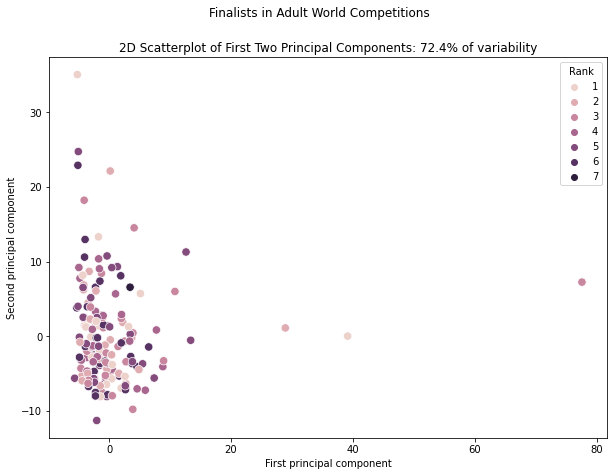

In [55]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=Y_pca[:,0], y=Y_pca[:,1], s=70, hue=adultWorldPCAFinalsdf.Rank)
plt.title("2D Scatterplot of First Two Principal Components: 72.4% of variability")
plt.suptitle("Finalists in Adult World Competitions")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [57]:
# run PCA on scaled data set with finalists
Y_scaled = scaler.fit_transform(Y)
pca = PCA(n_components=0.85, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
Y_scaled_pca = pca.fit_transform(Y_scaled)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.32438912 0.16152266 0.1412227  0.12795595 0.08365376 0.07218328]
[26.54379706 18.73038196 17.5138715  16.67094251 13.47946479 12.52126488]


Using a scaled version of the data, we need to keep 6 principal components to explain 85% of the variability.

Text(0, 0.5, 'Second principal component')

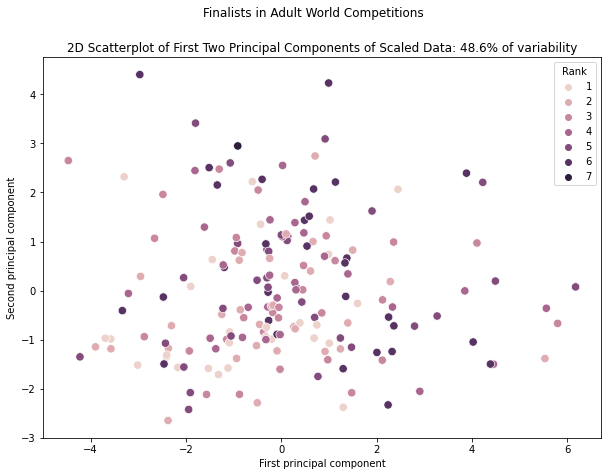

In [58]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=Y_scaled_pca[:,0], y=Y_scaled_pca[:,1], s=70, hue=adultWorldPCAFinalsdf.Rank)
plt.title("2D Scatterplot of First Two Principal Components of Scaled Data: 48.6% of variability")
plt.suptitle("Finalists in Adult World Competitions")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [59]:
# run PCA on data set with 0s
X = adultWorldPCAdf[numeric].copy()
pca = PCA(n_components=0.85, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.49036515 0.30857275 0.12617278]
[355.6123151  282.0952542  180.38475843]


We also need to keep three principal components to explain at least 85% of the variability in the data set with all competitors.

Text(0, 0.5, 'Second principal component')

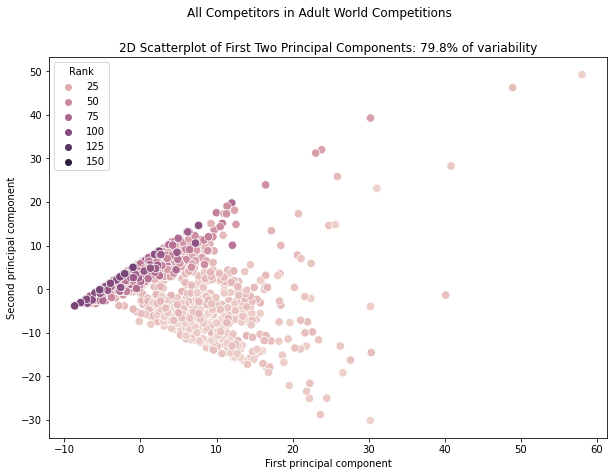

In [60]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], s=70, hue=adultWorldPCAdf.Rank)
plt.title("2D Scatterplot of First Two Principal Components: 79.8% of variability")
plt.suptitle("All Competitors in Adult World Competitions")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [61]:
# run PCA on scaled data set with 0s
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=0.85, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
X_scaled_pca = pca.fit_transform(X_scaled)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.62605978 0.14963751 0.07247228 0.06215644]
[144.59561714  70.69154253  49.19638376  45.56069155]


We need to keep 4 principal components to explain 85% of the variance in the scaled data set of all competitors.

Text(0, 0.5, 'Second principal component')

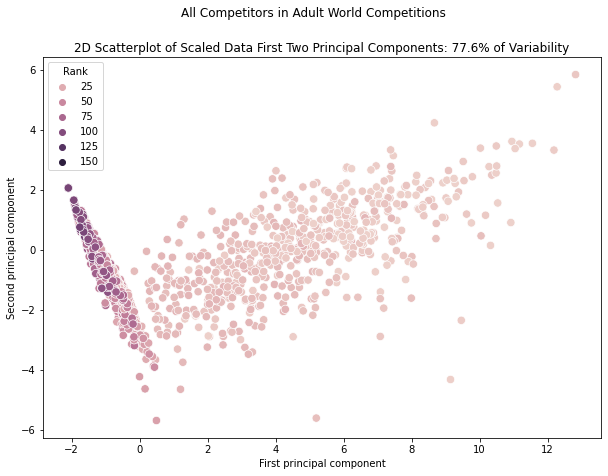

In [62]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=X_scaled_pca[:,0], y=X_scaled_pca[:,1], s=70, hue=adultWorldPCAdf.Rank)
plt.title("2D Scatterplot of Scaled Data First Two Principal Components: 77.6% of Variability")
plt.suptitle("All Competitors in Adult World Competitions")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

The last plot may be the easiest to interpret. Competitors that do not advance to semifinals and finals have a lot of 0s in their scores for those variables, so they have a higher rank in the competition. Competitors with ranks below 50 may have made it to semifinals and have more opportunity to get more attempts, zones, and tops.

### Level 3
### Exercise 3
Continue with the sports theme data set you like and normalize the data taking into account the outliers.

I will come back to this exercise if I have time at the end of the course.